# Mohammad Amin Rami
# 98101588
# CHW 1 Question 3
# Dimensonality Reduction With PCA

## Implementing PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def PCA(X, r):
    """
    input parameters:
        X = data matrix
        r = number of dimensions to reduce to
    output parameters:
        Y = low dimension data
        P = principal components
    """
    n, m = X.shape
    X_mean = np.mean(X, axis=1).reshape((-1, 1))
    X_tilde = X - X_mean
    U, S, VT = np.linalg.svd(X_tilde)
    P = U[:, :r]
    Y = P.T @ X_tilde
    return Y, P 
    

In [3]:
X = pd.read_csv('iris.csv')[['sepal_width', 'petal_length', 'petal_width', 'species']].to_numpy().T
labels_column = pd.read_csv('iris.csv')['Unnamed: 5']
labels = list(labels_column.unique())
Y, P = PCA(X, 2)

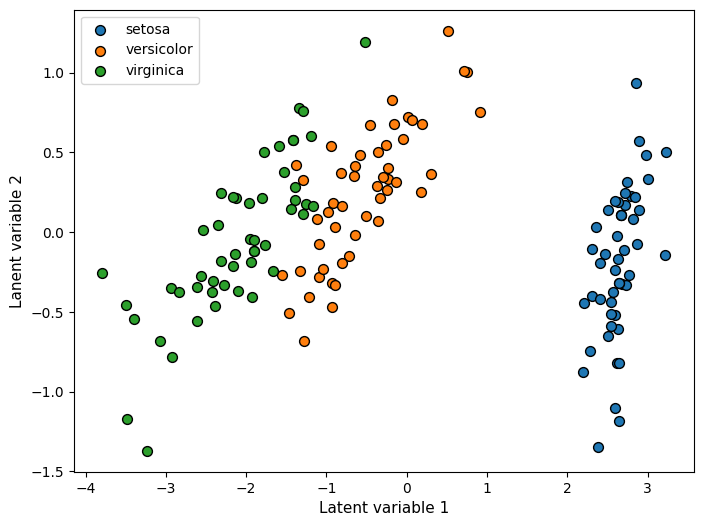

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

for label in labels:
    indices = labels_column == label
    ax.scatter(
        Y[0, indices],
        Y[1, indices],
        label=label,
        edgecolor='black',
        s=50
    )

    
plt.xlabel('Latent variable 1', fontsize=11)
plt.ylabel('Lanent variable 2', fontsize=11)
plt.legend()
plt.show()